In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Renaming the columns
df = df.rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#Aplly label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.target = le.fit_transform(df.target)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

403

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

EDA

In [20]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

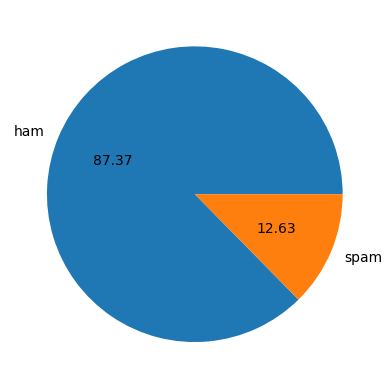

In [22]:
#visualize using a pie chart
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

THE DATA IS IMBALANCED

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df.text.apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [31]:
#For normal msgs
df[df.target==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [32]:
#spam 
df[df.target==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

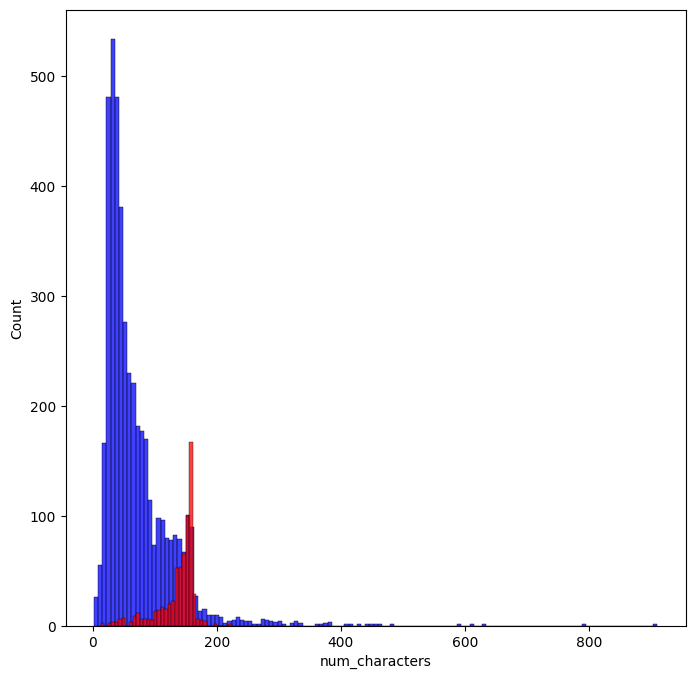

In [36]:
plt.figure(figsize=(8,8))
sns.histplot(df[df.target==0]['num_characters'],color='blue')
sns.histplot(df[df.target==1]['num_characters'],color='red')

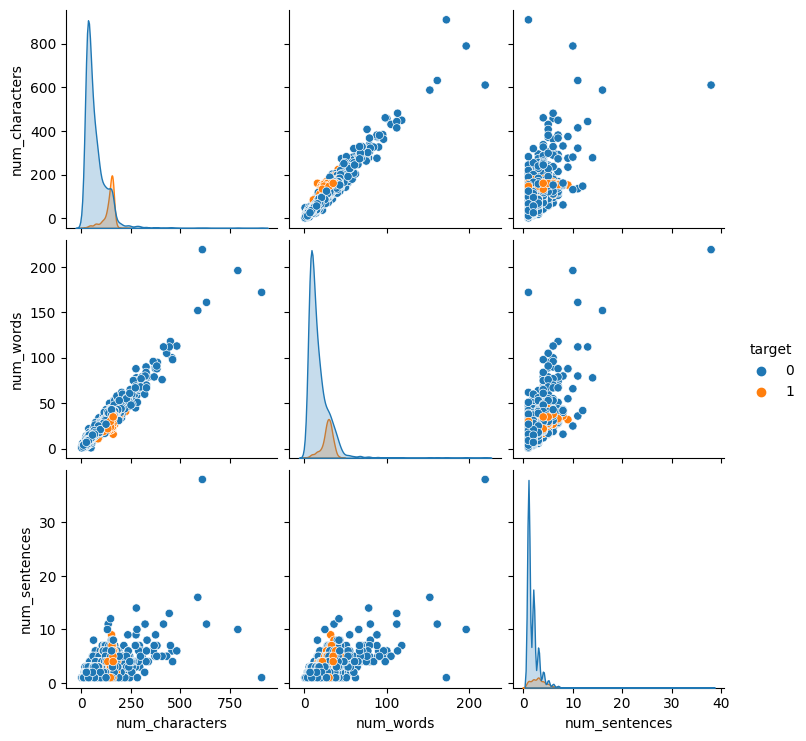

In [37]:
sns.pairplot(df,hue='target')

DATA PREPROCESSING

LOWERCASE

TOKENIZE

REMOVING SPECIAL CHARACTERS

REMOVING STOP WORDS

STEMMING

In [52]:
#Creating a function that will contain all of the above preprocessing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

transform_text('HI how ARE You and I loved you always forever, right? ! 20%^&*')

'hi love alway forev right 20'

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [53]:
df['transformed_text'] = df.text.apply(transform_text)
df.transformed_text
 

0       go jurong point avail bugi n great world la e ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


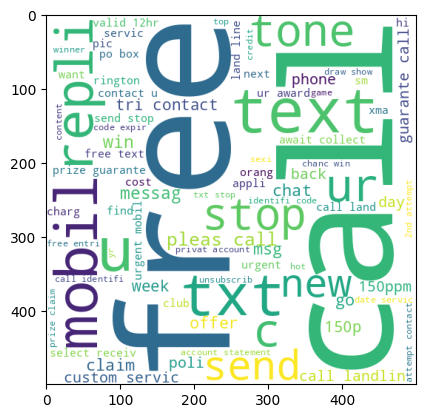

In [61]:
#CHeck using a wordcloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

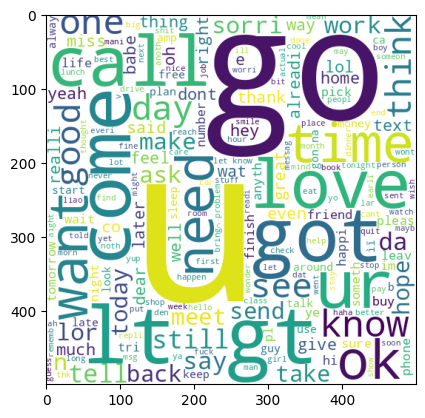

In [62]:
#CHeck using a wordcloud for normal messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
spam_corpus = []
for msg in df[df.target ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9883

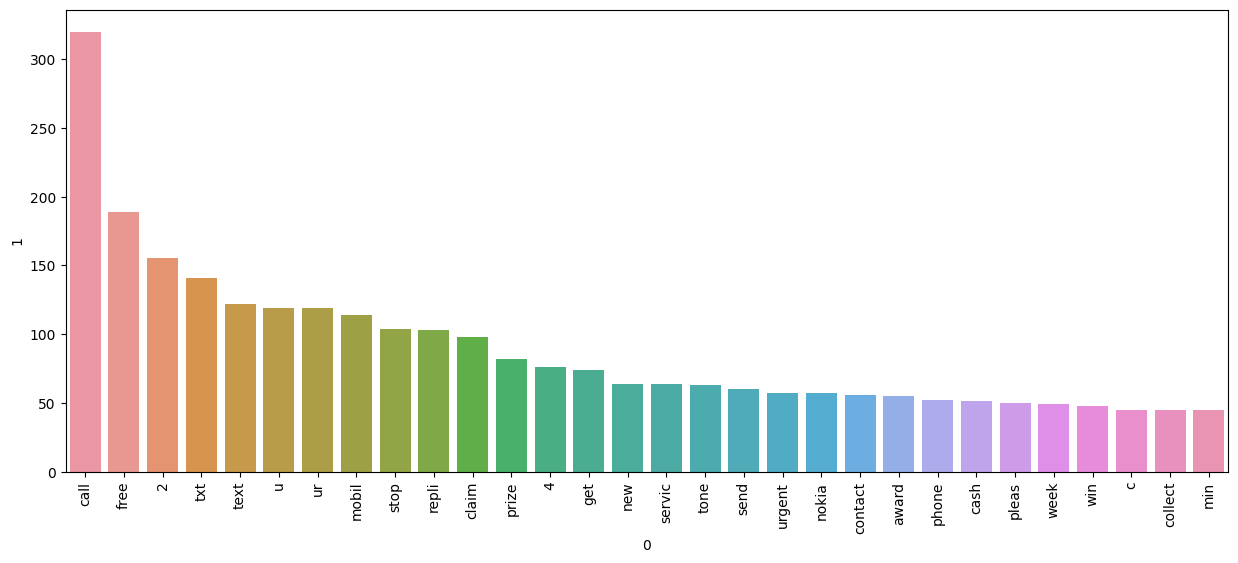

In [77]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

NOW WE GO ON TO BUILD THE MODEL

In [78]:
#NOW WE CONVERT TEXT TO NUMBER
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer()
cv = CountVectorizer()

x = cv.fit_transform(df.transformed_text).toarray()
x.shape

(5169, 6629)

In [79]:
y = df.target.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

#WIll try several models

#model selections
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
nb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
nb.fit(x_train,y_train)
 

GaussianNB()

In [82]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [83]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [84]:
lr.fit(x_train,y_train)

LogisticRegression()

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [87]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
svc.fit(x_train,y_train)

SVC()

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
lgb.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 515, number of negative: 3620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 333
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124547 -> initscore=-1.950062
[LightGBM] [Info] Start training from score -1.950062


LGBMClassifier()

In [ ]:
cat.fit(x_train,y_train)

In [93]:
#PREds
nbpred = nb.predict(x_test)
mnbpred = mnb.predict(x_test)
bnbpred = bnb.predict(x_test)
lrpred = lr.predict(x_test)
rfpred = rf.predict(x_test)
gbpred = gb.predict(x_test)
xgbpred = xgb.predict(x_test)
svcpred = svc.predict(x_test)
knnpred = knn.predict(x_test)
lgbpred = lgb.predict(x_test)
catpred = cat.predict(x_test)

#Evaluations
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


nbacc = accuracy_score(y_test,nbpred)
mnbacc = accuracy_score(y_test,mnbpred)
bnbacc = accuracy_score(y_test,bnbpred)
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('NB-->',nbacc)
print('MNB-->',mnbacc)
print('BNB-->',bnbacc)
print('LOGISTIC REG-->',lracc)
print('RANDOM FOREST-->',rfacc)
print('GB-->',gbacc)
print('XGB-->',xgbacc)
print('SVC-->',svcacc)
print('KNN-->',knnacc)
print('LIGHT GBM-->',lgbacc)
print('CATO-->',catacc)

NB--> 0.874274661508704
MNB--> 0.965183752417795
BNB--> 0.9709864603481625
LOGISTIC REG--> 0.9777562862669246
RANDOM FOREST--> 0.9729206963249516
GB--> 0.9584139264990329
XGB--> 0.9758220502901354
SVC--> 0.9709864603481625
KNN--> 0.9061895551257253
LIGHT GBM--> 0.9729206963249516
CATO--> 0.9700193423597679


In [95]:
#now get the precision scores


nbpr = precision_score(y_test,nbpred)
mnbpr = precision_score(y_test,mnbpred)
bnbpr = precision_score(y_test,bnbpred)
lrpr = precision_score(y_test,lrpred)
rfpr = precision_score(y_test,rfpred)
gbpr = precision_score(y_test,gbpred)
xgbpr = precision_score(y_test,xgbpred)
svcpr = precision_score(y_test,svcpred)
knnpr = precision_score(y_test,knnpred)
lgbpr = precision_score(y_test,lgbpred)
catpr = precision_score(y_test,catpred)

print('NB-->',nbpr)
print('MNB-->',mnbpr)
print('BNB-->',bnbpr)
print('LOGISTIC REG-->',lrpr)
print('RANDOM FOREST-->',rfpr)
print('GB-->',gbpr)
print('XGB-->',xgbpr)
print('SVC-->',svcpr)
print('KNN-->',knnpr)
print('LIGHT GBM-->',lgbpr)
print('CATO-->',catpr)

NB--> 0.5175438596491229
MNB--> 0.84
BNB--> 0.9736842105263158
LOGISTIC REG--> 0.9914529914529915
RANDOM FOREST--> 0.9910714285714286
GB--> 0.9523809523809523
XGB--> 0.9669421487603306
SVC--> 0.990909090909091
KNN--> 1.0
LIGHT GBM--> 0.9296875
CATO--> 1.0


Since the dataset is imbalanced, accuracy is not a reliable mearsure in this case. 

Preicision score is more reliable so we will be choosing the model that has the highest precision score.

Here i will choose CatBoostClassifier with CountVectorizer

SAVING THE BEST MODEL TO DEPLOY IT INTO A WEBSITE

In [96]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(cat,open('catboost_email.pkl','wb'))